# Домашнее задание - линейная регрессия

### Работа с признаками (8 баллов)

Скачайте датасет из материалов к уроку или по ссылке https://raw.githubusercontent.com/jupiterzhuo/travel-insurance/master/travel%20insurance.csv

> Я не придумал, как здесь закрепить файл, чтобы он не слетал после каждой перезагрузки, так что, пожалуйста, скачайте датасет :3


Описание признаков:

* Agency — название страхового агентства
* Agency Type — тип страхового агентства
* Distribution Channel — канал продвижения страхового агентства
* Product Name — название страхового продукта
* Duration — длительность поездки (количество дней)
* Destination — направление поездки
* Net Sales — сумма продаж
* Commission (in value) — комиссия страхового агентства
* Gender — пол застрахованного
* Age — возраст застрахованного

Ответ:
* Claim — потребовалась ли страховая выплата: «да» — 1, «нет» — 0

Обработайте пропущенные значения и примените написанные функции onehot_encode() и minmax_scale().

**Подсказка**: маску для категориальных признаков можно сделать фильтром cat_features_mask = (df.dtypes == "object").values

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Использовал для дз
def onehot_encoding(a):
    result = []
    categories = np.unique(a)
    for val in a:
        temp = np.zeros(len(set(a)))
        idx = list(categories).index(val)
        temp[idx] = 1
        result.append(temp)
    return np.array(result, dtype=int)

# Написал, так как предыдущее слишком долго выполнялось из-за циклов
def fast_onehot(a):
  """
  Превращает категориальные признаки в бинарные
  """
  categories, idx = np.unique(a, return_inverse=True)
  result = np.zeros((len(a), len(categories)), dtype=int)
  result[np.arange(len(a)), idx] = 1
  return result


def minmax_scale(X):
  """
  Нормирует значения по столбцам
  """
  result = []
  min = np.min(X, axis=0)
  max = np.max(X, axis=0)

  range = max - min
  range[range == 0.] = 1.

  for row in X:
    norm_row = (row - min) / range
    result.append(norm_row)

  return np.array(result)

In [ ]:
df = pd.read_csv("sample_data/travel_insurance.csv")
cat_features_mask = (df.dtypes == "object").values

cat_columns = df.columns[cat_features_mask]
num_columns = df.columns[~cat_features_mask]

df_cat = df[cat_columns]
df_num = df[num_columns]

len(df[df["Claim"] == "No"]), len(df[df["Claim"] == "Yes"])
# Сильно больше значений No, чем Yes

(62399, 927)

In [ ]:
from sklearn import impute

replaser = impute.SimpleImputer(strategy="mean")
df_num = pd.DataFrame(data=replaser.fit_transform(df_num), columns=df_num.columns)

df_num.shape

(63326, 4)

In [ ]:
df_num.isnull().sum()

,0
Duration,0
Net Sales,0
Commision (in value),0
Age,0


In [ ]:
df_cat = df_cat.fillna("empt")
df_cat.shape

(63326, 7)

In [ ]:
df_cat = df_cat.reset_index(drop=True)
df_num = df_num.reset_index(drop=True)
df = pd.concat([df_num, df_cat], axis=1)
df.shape

(63326, 11)

In [ ]:
cat_array = []

for col in cat_columns:
  col_data = df[col]
  # encoded = onehot_encoding(col_data) - Слишком долго
  encoded = fast_onehot(col_data)
  cat_array.append(encoded)
  print(f"'{col}': {encoded.shape[1]} бинарных признаков")


# 'Agency': 14 бинарных признаков
# 'Agency Type': 2 бинарных признаков
# 'Distribution Channel': 2 бинарных признаков
# 'Product Name': 22 бинарных признаков
# 'Claim': 2 бинарных признаков
# 'Destination': 82 бинарных признаков
# 'Gender': 2 бинарных признаков

'Agency': 16 бинарных признаков
'Agency Type': 2 бинарных признаков
'Distribution Channel': 2 бинарных признаков
'Product Name': 26 бинарных признаков
'Claim': 2 бинарных признаков
'Destination': 149 бинарных признаков
'Gender': 3 бинарных признаков


In [ ]:
cat_dfs = []

for i, encoded_array in enumerate(cat_array):
    col_name = cat_columns[i]

    # Названия для столбцов с бинарными признаками
    unique_categories = df[col_name].unique()
    feature_names = [f"{col_name}_{cat}" for cat in unique_categories[1:]]

    # DataFrame для этого признака
    col_df = pd.DataFrame(encoded_array[:, 1:], columns=feature_names)
    cat_dfs.append(col_df)
    # Я убираю один столбик (drop first), так как это предотвращает линейную зависимость

df_cat = pd.concat(cat_dfs, axis=1)
df_cat.head(10)

,Agency_CWT,Agency_JZI,Agency_KML,Agency_EPX,Agency_C2B,Agency_JWT,Agency_RAB,Agency_SSI,Agency_ART,Agency_CSR,...,Destination_SOLOMON ISLANDS,"Destination_IRAN, ISLAMIC REPUBLIC OF",Destination_GUATEMALA,Destination_FRENCH POLYNESIA,Destination_TIBET,Destination_SENEGAL,Destination_REPUBLIC OF MONTENEGRO,Destination_BOSNIA AND HERZEGOVINA,Gender_empt,Gender_M
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
num_array = []

num_array = minmax_scale(df_num.values)

df_num = pd.DataFrame(num_array, columns=num_columns)
df_num

,Duration,Net Sales,Commision (in value),Age
0,0.038501,0.300250,0.033757,0.686441
1,0.038501,0.300250,0.033757,0.601695
2,0.013721,0.283153,0.104762,0.271186
3,0.012697,0.291410,0.083810,0.271186
4,0.016588,0.307923,0.041905,0.347458
...,...,...,...,...
63321,0.023142,0.353628,0.043210,0.262712
63322,0.012288,0.357798,0.049383,0.338983
63323,0.000819,0.339450,0.022222,0.483051
63324,0.001024,0.339450,0.022222,0.533898


In [ ]:
df_cat = df_cat.reset_index(drop=True)
df_num = df_num.reset_index(drop=True)
df = pd.concat([df_num, df_cat], axis=1)
df.head()

,Duration,Net Sales,Commision (in value),Age,Agency_CWT,Agency_JZI,Agency_KML,Agency_EPX,Agency_C2B,Agency_JWT,...,Destination_SOLOMON ISLANDS,"Destination_IRAN, ISLAMIC REPUBLIC OF",Destination_GUATEMALA,Destination_FRENCH POLYNESIA,Destination_TIBET,Destination_SENEGAL,Destination_REPUBLIC OF MONTENEGRO,Destination_BOSNIA AND HERZEGOVINA,Gender_empt,Gender_M
0,0.038501,0.300250,0.033757,0.686441,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.038501,0.300250,0.033757,0.601695,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.013721,0.283153,0.104762,0.271186,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.012697,0.291410,0.083810,0.271186,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0.016588,0.307923,0.041905,0.347458,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
f"В датасете осталось {df.isnull().sum().sum()} пустых значений"
# Должно быть пусто

'В датасете осталось 0 пустых значений'

Подробный анализ и подготовка датасета часто помогают улучшить качество модели. Ниже представлено несколько идей преобразований. Вы можете применить одно или несколько из этих преобразований (а можете не применять), чтобы помочь будущей модели.

1. Посмотрите на количественные признаки. Возможно, в некоторых признаках есть выбросы - значения, которые сильно выбиваются. Такие значения полезно удалять. Советуем присмотреться к колонке Duration)

2. Можно заметить, что one hot encoding сильно раздувает количество столбцов. Радикальное решение - можно попробовать выбросить все категориальные признаки из датасета.

3. Если все-таки оставляете категориальные признаки, то подумайте, как уменьшить количество столбцов после one hot encoding. Признаки с большим количеством значений (Duration **(Кажется, тут должно быть Destination)** - 149! разных стран) можно удалить или попробовать сгруппировать некоторые значения.

4. Downsampling. Датасет достаточно большой, разница в классах огромная. Можно уменьшить число наблюдений с частым ответом.

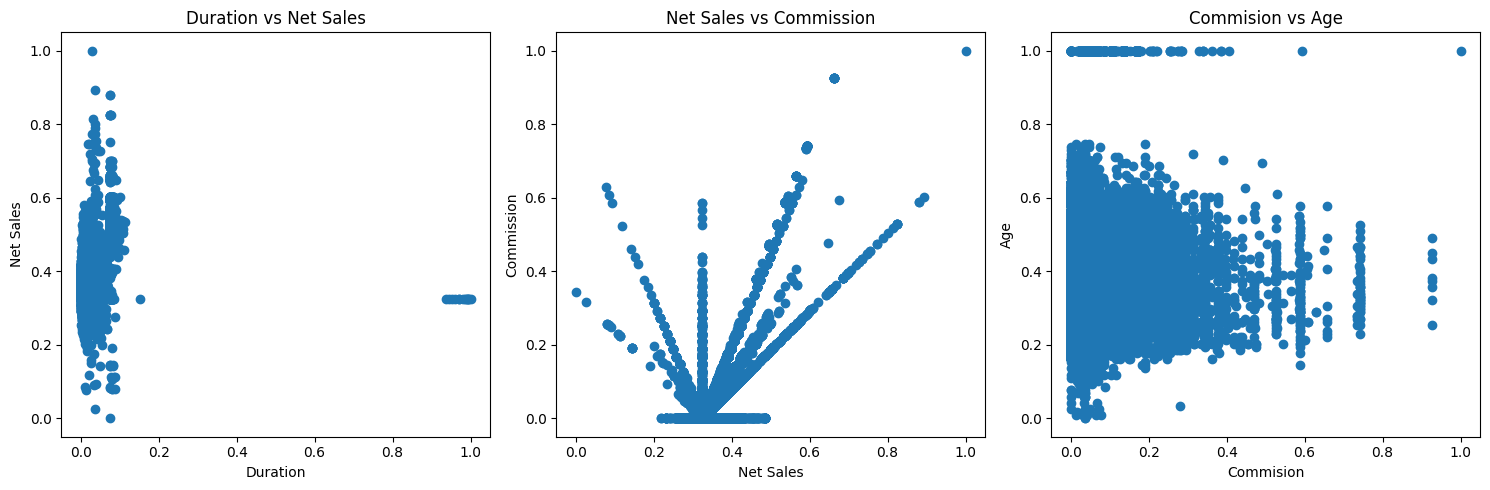

In [ ]:
import matplotlib.pyplot as plt

def draw_num_scatters(df):
  """
  Строит 3 красивых скаттера для анализа числовых значений датассета
  """

  fig, axes = plt.subplots(1, 3, figsize=(15, 5))

  axes[0].scatter(df.Duration, df['Net Sales'])
  axes[0].set_xlabel('Duration')
  axes[0].set_ylabel('Net Sales')
  axes[0].set_title('Duration vs Net Sales')

  axes[1].scatter(df['Net Sales'], df['Commision (in value)'])
  axes[1].set_xlabel('Net Sales')
  axes[1].set_ylabel('Commission')
  axes[1].set_title('Net Sales vs Commission')

  axes[2].scatter(df['Commision (in value)'], df['Age'])
  axes[2].set_xlabel('Commision')
  axes[2].set_ylabel('Age')
  axes[2].set_title('Commision vs Age')

  plt.tight_layout()
  plt.show()

draw_num_scatters(df)

1. По графику видно, что в Duration есть значения, значительно превышающие основной кластер
2. Интересная фигура, в правой верхней части которой лежит подозрительная точка
3. Age как-то странно клестеризуется сверху. Интересно, есть ли там значения больше 100))

(На самом деле нет, но было бы забавно)

Избавимся от всего ненужного

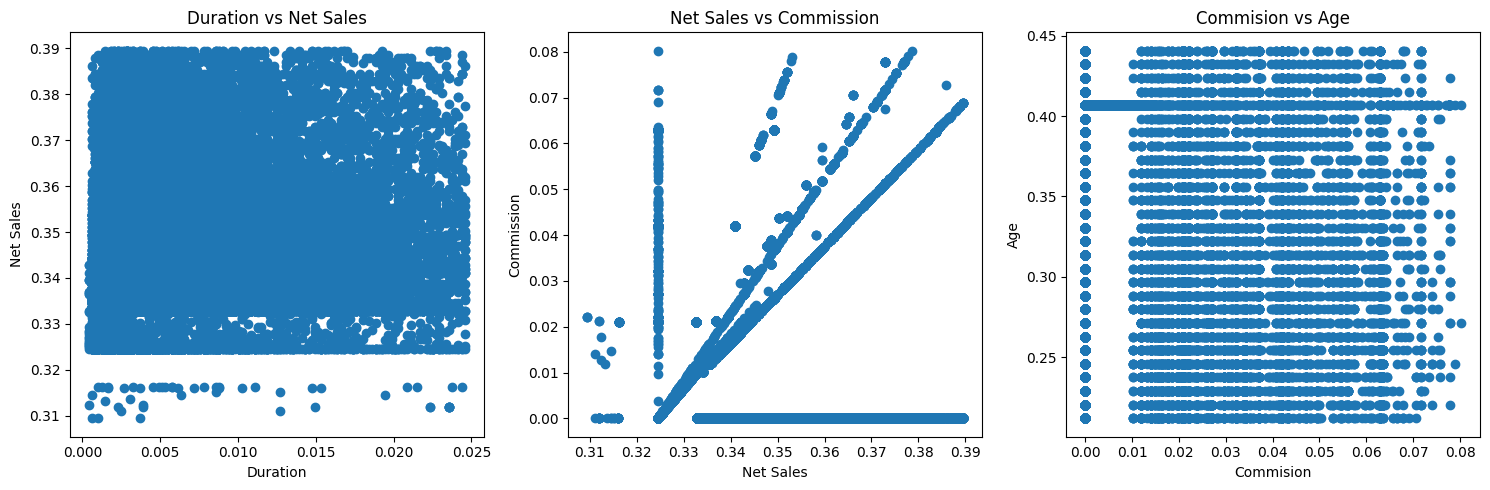

In [ ]:
def remove_outliers_iqr(df, column):
    """
    Удаляет выбросы по методу IQR
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


df_clean = df.copy()
for col in num_columns:
  df_clean = remove_outliers_iqr(df_clean, col)

draw_num_scatters(df_clean)

Пожалуй, можно убрать столбцы с признаками из Destination, так как это слишком сильно увеличивает количество параметров;

Из 149 (соответственно 148 стобцов после drop first)

In [ ]:
df_clean = df_clean.loc[:, ~df_clean.columns.str.startswith("Destination")]

df_clean.head()

,Duration,Net Sales,Commision (in value),Age,Agency_CWT,Agency_JZI,Agency_KML,Agency_EPX,Agency_C2B,Agency_JWT,...,Product Name_Single Trip Travel Protect Platinum,Product Name_Annual Travel Protect Gold,Product Name_Single Trip Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Child Comprehensive Plan,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Claim_Yes,Gender_empt,Gender_M
11,0.000614,0.309425,0.022222,0.398305,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18,0.001024,0.309425,0.022222,0.398305,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21,0.002867,0.362927,0.040705,0.372881,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0.001843,0.339074,0.015485,0.211864,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0.006349,0.332694,0.020952,0.279661,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


# А что там со строками? Почему так много?

Downsampling поможет! (наверное, сейчас проверим)

In [ ]:
df_clean.shape

(40429, 49)

Строк очень много. Какие есть подходы?

1. **Случайная выборка:**

Берём 10.000 случайных строк. Быстро и просто, но можно потерять важные признаки

2. **Стратифицированная выборка:**

Берём 10.000 случайных строк, но которые сохраняют все пропорции классов относительно друг друга. То есть было 70% класса А и 30% класса Б, значит в выборе будет такая же пропорция 7:3

3. **Агрегация по группам:**

Группировка по ключевым столбцам и нахождение среднего. Это я вычитал и сразу пришла идея объединения 2 пункта с этим. Например, берём несколько мини выборок (допустим 110 по 400 строк в каждой) и находим средние значения по выборкам. Получаем 110 строк, которые примерно показывают динамику в датасете. Удобно, но больше подходит для числовых данных, а у нас много категориальных столбцов.

In [ ]:
# Решил взятьстратифицированную выборку (~20%)
from sklearn.model_selection import train_test_split

def downsample(df, size):
  X = df.drop("Claim_Yes", axis=1)
  y = df["Claim_Yes"]

  X_small, _, y_small, _ = train_test_split(
      X, y,
      train_size=size,
      stratify=y,
      random_state=42
  )

  return pd.concat([X_small, y_small], axis=1)

df_sample = downsample(df_clean, 0.2)
df_sample.shape

(8085, 49)

In [ ]:
# После следующего задания я понял, что было бы хорошо иметь +- одинаковое количество 0 и 1 в 'Claim_Yes'
from sklearn.utils import resample

def balance_class(df, target_col="Claim_Yes"):
  df_majority = df[df[target_col] == 0]
  df_minority = df[df[target_col] == 1]

  df_maj_downsampled = resample(
      df_majority,
      replace=False,
      n_samples=len(df_minority),
      random_state=42
  )

  df_balanced = pd.concat([df_maj_downsampled, df_minority])
  return df_balanced

df_sample_balance = balance_class(df_clean)
df_sample_balance.shape

(824, 49)

### Применение линейной регрессии (10 баллов)

Это задача классификации, но её можно решить с помощью линейной регрессии, если округлять предсказанный ответ до целого и выбирать ближайший по значению ответ из множества {0, 1}.

Вынесите признак 'Claim' в вектор ответов и разделите датасет на обучающую и тестовую выборку в соотношении 80 к 20. Зафиксируйте random_state.

**Подсказка:** быстро перевести Yes/No в 1/0 можно так - np.where(df['Claim'] == 'Yes', 1,0)

In [ ]:
# разделение на test/train
from sklearn.model_selection import train_test_split

X, y = df_sample.drop("Claim_Yes", axis=1), df_sample["Claim_Yes"]
X_b, y_b = df_sample_balance.drop("Claim_Yes", axis=1), df_sample_balance["Claim_Yes"]

# Обычная выборка
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Сбалансированная выборка
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_b, y_b,
    test_size=0.2,
    random_state=42
)

Найдите аналитическое решение для обучающей выборки: обычное и регуляризацией l2.

In [ ]:
# Обе выборки дают ошибку
X = np.column_stack([np.ones(X_train.shape[0]), X_train.values])
y = y_train.to_numpy()

w = np.linalg.inv(X.T @ X) @ X.T @ y
# Даёт ошибку, так как X.T @ X - вырожденная

LinAlgError: Singular matrix

In [ ]:
lm = 0.1
E = np.eye(X.shape[1])

X = np.column_stack([np.ones(X_train.shape[0]), X_train.values])
y = y_train.to_numpy()

X_b = np.column_stack([np.ones(X_train_b.shape[0]), X_train_b.values])
y_b = y_train_b.to_numpy()
E_b = np.eye(X_b.shape[1])

w = np.linalg.inv(X.T @ X - lm**2 * E) @ X.T @ y
w_balanced = np.linalg.inv(X_b.T @ X_b - lm**2 * E_b) @ X_b.T @ y_b
w, w_balanced

(array([-5.39780588e-02, -1.49488065e-02,  2.44080531e-01, -6.12748482e-02,
        -3.83288035e-02, -1.27654350e-02,  5.91385956e-03, -4.22575030e-02,
         1.22434108e-01, -4.57886691e-02, -6.92039143e-03, -1.81747645e-02,
         0.00000000e+00, -1.61026954e-02, -2.95186073e-03, -1.12490530e-02,
        -1.21181618e-02, -1.03804912e-02, -3.61700034e-03,  0.00000000e+00,
        -8.52513301e-03,  1.06194494e-02,  6.28593483e-03, -9.65755223e-03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -8.47990687e-03,  9.42147920e-03,  2.16504744e-03,
         0.00000000e+00,  3.43879365e-02, -3.69831953e-02,  0.00000000e+00,
        -1.32423813e-02, -6.92039139e-03,  3.34755754e-02, -6.30076754e-03,
         0.00000000e+00, -4.94828541e-03,  0.00000000e+00, -1.03804915e-02,
        -3.61700030e-03,  0.00000000e+00, -1.25583134e-02,  1.14903055e-04,
        -3.95013771e-04]),
 array([-6.47140313e-01,  1.48849682e+01,  5.02591522e+00, -1

Постройте модель LinearRegression, примените к тестовой выборке и посчитайте MSE (можно использовать библиотеку sklearn)

In [ ]:
# обучите модель линейной регрессии LinearRegression на обучающей выборке, примените к тестовой
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report

X, y = df_sample.drop("Claim_Yes", axis=1), df_sample["Claim_Yes"]
X_b, y_b = df_sample_balance.drop("Claim_Yes", axis=1), df_sample_balance["Claim_Yes"]
X_big, y_big = df_clean.drop("Claim_Yes", axis=1), df_clean["Claim_Yes"]

# Обычная выборка
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Сбалансированная выборка
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_b, y_b,
    test_size=0.2,
    random_state=42
)

linear_model = LinearRegression()
logistic_model = LogisticRegression(class_weight='balanced', random_state=42)
random_model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=200,
    random_state=42
)

Проверим **обычную выборку**

In [ ]:
threshold = 0.05

# Linear Regression Test
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
y_pred = (y_pred > threshold).astype(int)

y_pred_big = linear_model.predict(X_big)
y_pred_big = (y_pred_big > threshold).astype(int)

print("Linear Regression:")
print("\n\tЛокальный тест")
print("MSE:", mean_squared_error(y_pred, y_test))
print("\n")
print(classification_report(y_pred, y_test))
print("\n\tОбщий тест по датасету")
print("MSE:", mean_squared_error(y_pred_big, y_big))
print(classification_report(y_pred_big, y_big))

# Logistic Regression Test
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
y_pred_big = logistic_model.predict(X_big)

print("Logistic Regression:")
print("\n\tЛокальный тест")
print("MSE:", mean_squared_error(y_pred, y_test))
print("\n")
print(classification_report(y_pred, y_test))
print("\n\tОбщий тест по датасету")
print("MSE:", mean_squared_error(y_pred_big, y_big))
print(classification_report(y_pred_big, y_big))



# Random Forest Classifier Test
random_model.fit(X_train, y_train)
y_pred = random_model.predict(X_test)
y_pred_big = random_model.predict(X_big)

print("Random Forest Classifier:")
print("\n\tЛокальный тест")
print("MSE:", mean_squared_error(y_pred, y_test))
print("\n")
print(classification_report(y_pred, y_test))
print("\n\tОбщий тест по датасету")
print("MSE:", mean_squared_error(y_pred_big, y_big))
print(classification_report(y_pred_big, y_big))

Linear Regression:

	Локальный тест
MSE: 0.04267161410018553


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1559
           1       0.21      0.07      0.10        58

    accuracy                           0.96      1617
   macro avg       0.59      0.53      0.54      1617
weighted avg       0.94      0.96      0.95      1617


	Общий тест по датасету
MSE: 0.04523980311162779
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     38808
           1       0.25      0.06      0.10      1621

    accuracy                           0.95     40429
   macro avg       0.60      0.53      0.54     40429
weighted avg       0.93      0.95      0.94     40429

Logistic Regression:

	Локальный тест
MSE: 0.19356833642547927


              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1299
           1       0.63      0.04      0.07       318

    

Теперь проверим **сбалансированную выборку**

In [ ]:
threshold = 0.5

# Linear Regression Test
linear_model.fit(X_train_b, y_train_b)
y_pred = linear_model.predict(X_test_b)
y_pred = (y_pred > threshold).astype(int)

y_pred_big = linear_model.predict(X_big)
y_pred_big = (y_pred_big > threshold).astype(int)

print("Linear Regression:")
print("\n\tЛокальный тест")
print("MSE:", mean_squared_error(y_pred, y_test_b))
print("\n")
print(classification_report(y_pred, y_test_b))
print("\n\tОбщий тест по датасету")
print("MSE:", mean_squared_error(y_pred_big, y_big))
print(classification_report(y_pred_big, y_big))

# Logistic Regression Test
logistic_model.fit(X_train_b, y_train_b)
y_pred = logistic_model.predict(X_test_b)
y_pred_big = logistic_model.predict(X_big)

print("Logistic Regression:")
print("\n\tЛокальный тест")
print("MSE:", mean_squared_error(y_pred, y_test_b))
print("\n")
print(classification_report(y_pred, y_test_b))
print("\n\tОбщий тест по датасету")
print("MSE:", mean_squared_error(y_pred_big, y_big))
print(classification_report(y_pred_big, y_big))

# Random Forest Classifier Test
random_model.fit(X_train_b, y_train_b)
y_pred = random_model.predict(X_test_b)
y_pred_big = random_model.predict(X_big)

print("Random Forest Classifier:")
print("\n\tЛокальный тест")
print("MSE:", mean_squared_error(y_pred, y_test_b))
print("\n")
print(classification_report(y_pred, y_test_b))
print("\n\tОбщий тест по датасету")
print("MSE:", mean_squared_error(y_pred_big, y_big))
print(classification_report(y_pred_big, y_big))

Linear Regression:

	Локальный тест
MSE: 0.2545454545454545


              precision    recall  f1-score   support

           0       0.81      0.72      0.76        93
           1       0.68      0.78      0.73        72

    accuracy                           0.75       165
   macro avg       0.75      0.75      0.74       165
weighted avg       0.75      0.75      0.75       165


	Общий тест по датасету
MSE: 0.1751218184966237
              precision    recall  f1-score   support

           0       0.83      1.00      0.90     33201
           1       0.68      0.04      0.07      7228

    accuracy                           0.82     40429
   macro avg       0.75      0.52      0.49     40429
weighted avg       0.80      0.82      0.75     40429

Logistic Regression:

	Локальный тест
MSE: 0.2545454545454545


              precision    recall  f1-score   support

           0       0.88      0.70      0.78       105
           1       0.61      0.83      0.70        60

    acc

## Вывод

- Модели, обученные на **сбалансированной выборке**, неплохо справляется с локальными тестами, но на всём датасете редко попадает в правильные классы

- Модели, обученные на **обычной выборке**, выдают примерно одинаковые результаты для выборки и общего теста. Однако Random Forest Classifier справляется лучше всех с нахождением класса 1

### Вывод (1 балла)

> Напишите краткий вывод по заданию (достаточно пары предложений). Расскажите, какие способы предобработки данных вы выбрали и почему. Насколько хороша ваша модель?


**С данными я поступил так:**

1. Пропущенные значения заменил на среднее для числовых и на "empty" для категориальных (так как если бы я просто убрал строки с пропущенными значениями, то я бы потерял слишком много информации)

2. Создал столбики для категориальных признаков, превратив каждый в бинарный и нормализовал числа по столбикам.

3. У каждой группы признаков (группа - подстолбики, относящиеся к одному столбику в изначальном файле) убрал по одному столбику, чтобы избавиться от линейной зависимости

4. Удалил все выбросы (выбросы никому не нужны, они портят предсказания :3)

5. Убрал столбики Destinations, так как они занимали 148 столбиков!! (И вряд ли играли особо важную роль)

6. Взял выборку из всего датасета, чтобы облегчить жизнь Google Colab, чтобы он не считал веса для всего датасета)

**Модель справляется отлично и ошибается всего в +- 1% случаев. Но только потому, что в датасете значительно больше класса Claim_No, чем Claim_Yes. Подробнее о рассуждениях можно прочитать выше в Выводе**

Телеграм: @WaltuhN